# GIS data processing

## Shape files

Load the required modules.

In [1]:
from fiona import collection
import matplotlib.pyplot as plt
%matplotlib inline

Create a fiona collection from the shape files.

In [2]:
input = collection('Data/USA.gdb', 'r')

Check the schema of the shape file.

In [3]:
input.schema

{'geometry': 'MultiPolygon',
 'properties': OrderedDict([('NAME', 'str:110'),
              ('COUNTRY', 'str:20'),
              ('STATEABB', 'str:20'),
              ('Shape_Length', 'float'),
              ('Shape_Area', 'float'),
              ('BORDER', 'int'),
              ('REGION', 'str:20')])}

List the states in the US.

In [4]:
states = set()
for region in input:
    states.add(region['properties']['NAME'])
print('number of states in US: {0}'.format(len(states)))
print('states: ', end='')
print(*states, sep=', ')

number of states in US: 51
states: Maryland, Pennsylvania, Florida, Rhode Island, Mississippi, Hawaii, Arkansas, Massachusetts, South Dakota, Idaho, Colorado, New York, Arizona, Iowa, Michigan, Vermont, Wisconsin, Nebraska, California, New Hampshire, Oklahoma, Louisiana, Kentucky, Delaware, Connecticut, Alaska, Tennessee, Georgia, Indiana, Kansas, Oregon, South Carolina, Montana, Maine, Minnesota, Nevada, Ohio, Missouri, District of Columbia, New Mexico, North Dakota, Utah, Washington, Illinois, Alabama, North Carolina, Texas, West Virginia, New Jersey, Virginia, Wyoming


Define a function that will return the points that define the polygon for a region.

In [5]:
def get_region(input, n):
    return input[n]['geometry']['coordinates'][0][0]

Plot all regions in the shapefile, this will be a map of the USA.

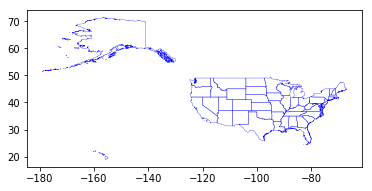

In [6]:
plt.axes().set_aspect('equal')
for i in input.keys():
    region = get_region(input, i)
    x = [x[0] for x in region]
    y = [x[1] for x in region]
    plt.plot(x, y, 'b', linewidth=0.3)

The bounds of the entire USA are given by an attribute.

In [7]:
input.bounds

(-179.13073424448964,
 18.913788476756963,
 -66.98181454720344,
 71.39842062001577)

Define a function that plots the state with the given name.

In [8]:
def plot_state(input, name):
    plt.axes().set_aspect('equal')
    for i in input.keys():
        if input[i]['properties']['NAME'] == name:
            region = get_region(input, i)
            x = [t[0] for t in region]
            y = [t[1] for t in region]
            plt.plot(x, y, 'b', linewidth=0.7)

Plot Florida's outline.

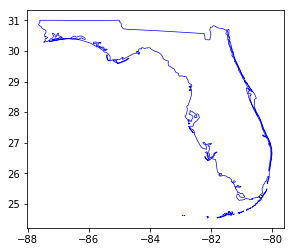

In [9]:
plot_state(input, 'Florida')

## GeoJSON files

### Reading GeoJSON files & Shapely

Load the required modules.

In [15]:
import geojson
import shapely
import shapely.geometry

In [16]:
data = geojson.load(open('Data/countries.geo.json'))
countries = data['features']

In [17]:
country_ids = [country['id'] for country in countries]
country_ids

['AFG',
 'AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'ATA',
 'ATF',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHS',
 'BIH',
 'BLR',
 'BLZ',
 'BMU',
 'BOL',
 'BRA',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'COD',
 'COG',
 'COL',
 'CRI',
 'CUB',
 '-99',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ERI',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FLK',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GMB',
 'GNB',
 'GNQ',
 'GRC',
 'GRL',
 'GTM',
 'GUF',
 'GUY',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KOR',
 'CS-KM',
 'KWT',
 'LAO',
 'LBN',
 'LBR',
 'LBY',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDA',
 'MDG',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MWI',
 'MYS',
 'NAM',
 'NCL',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN'

In [18]:
def get_country_shape(countries, country_id):
    for country in countries:
        if country['id'] == country_id:
            return shapely.geometry.shape(country['geometry'])

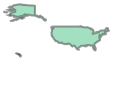

In [19]:
usa = get_country_shape(countries, 'USA')
usa

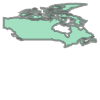

In [20]:
canada = get_country_shape(countries, 'CAN')
canada

## GeoTIFF files

Load the required modules.

In [16]:
import gdal
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

Open GeoTIFF file.

In [2]:
data = gdal.Open('Data/cea.tif')

Check the number of raster bands.

In [9]:
data.RasterCount

1

Check the number of pixels in the raster.

In [14]:
data.RasterXSize, data.RasterYSize

(514, 515)

Retrieve the first (and only) band as a numpy array.

In [10]:
raster_data = data.GetRasterBand(1).ReadAsArray()

Note that the $X$ and $Y$ axes are swapped in the array.

In [11]:
raster_data.shape

(515, 514)

Typically, the data in a band in a TIFF file are unsigned 8-bit integers.

In [12]:
raster_data.dtype

dtype('uint8')

Plot the image, using a grayscale color map.

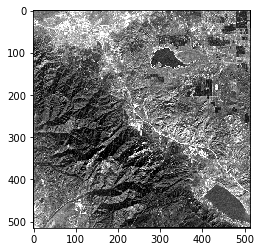

In [13]:
plt.imshow(raster_data, cmap=cm.gray);

Important features of a GeoTIFF file are its geo-transform, and its projection.

In [6]:
data.GetGeoTransform()

(-28493.166784412522,
 60.02213698319374,
 0.0,
 4255884.5438021915,
 0.0,
 -60.02213698319374)

In [7]:
data.GetProjection()

'PROJCS["unnamed",GEOGCS["NAD27",DATUM["North_American_Datum_1927",SPHEROID["Clarke 1866",6378206.4,294.9786982138982,AUTHORITY["EPSG","7008"]],AUTHORITY["EPSG","6267"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4267"]],PROJECTION["Cylindrical_Equal_Area"],PARAMETER["standard_parallel_1",33.75],PARAMETER["central_meridian",-117.333333333333],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'

To easily retrieve a GeoTIFF file's metadata, the `gdalinfo` command line utility is very useful.

In [8]:
!gdalinfo Data/cea.tif

Driver: GTiff/GeoTIFF
Files: Data/cea.tif
Size is 514, 515
Coordinate System is:
PROJCS["unnamed",
    GEOGCS["NAD27",
        DATUM["North_American_Datum_1927",
            SPHEROID["Clarke 1866",6378206.4,294.9786982138982,
                AUTHORITY["EPSG","7008"]],
            AUTHORITY["EPSG","6267"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4267"]],
    PROJECTION["Cylindrical_Equal_Area"],
    PARAMETER["standard_parallel_1",33.75],
    PARAMETER["central_meridian",-117.333333333333],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-28493.166784412522247,4255884.543802191503346)
Pixel Size = (60.022136983193739,-60.022136983193739)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  -28493.167, 4255884.544) (117d38'27.05"W, 33d56'37.74"N)
Lower Left  (  -28493.167, 4224973.143) (

In [29]:
data.GetMetadata_Dict()

{'AREA_OR_POINT': 'Area'}

To illustrate GeoTIFF file writing, we will normalize the raster band to the interval $\[0, 1\]$, and store it as single precisoin floating point data.

In [17]:
new_raster_data = np.empty(raster_data.shape, dtype=np.float32)

In [18]:
new_raster_data = raster_data/raster_data.max()

First, get the appropirate driver. GDAL supports many, but we need the `GTIFF` (i.e., GeoTIFF) driver.

In [23]:
driver = gdal.GetDriverByName('GTIFF')

Using the driver, a new file can be created. $X$ and $Y$ size, as well as the number of raster bands and the data type have to be specified.

In [24]:
new_data = driver.Create('Data/gdal_to_be_removed.tif',
                         data.RasterXSize, data.RasterYSize, 1,
                         gdal.GDT_Float32, options=['COMPRESSION=LZW'])

The projection and geo-transform are the same as for the original data.

In [25]:
new_data.SetProjection(data.GetProjection())

0

In [26]:
new_data.SetGeoTransform(data.GetGeoTransform())

0

Now we write the new numpy array to the first (and only) raster band.

In [27]:
new_data.GetRasterBand(1).WriteArray(new_raster_data)

0

Flush the data to disk.

In [28]:
new_data.FlushCache()